# General instructions
Basically, all of this was written to help explore problems that involved various calculations with Young Tableaux by automating it. Some notable highlights is the ability to compute the number of Standard Young Tableaux via the Hook Length Formula, as well as the p-core and p-quotient for arbitrary p. It also provides an easy-to-use interface that makes visualizing them easier.

To start using it, run the first cell in order to use the functions and so on defined in it in later cells.

In [1]:
import math
import copy
def hamming(n): # 11=1011_2 -> w(11) = 3
    ans = 0
    while (n > 0):
        ans += n%2
        n //= 2
    return ans
def v2(n): #returns \nu_2(n), ex v2(24) = 3, v2(5) = 0, etc.
    ans = 0
    while (n%2 == 0):
        ans += 1
        n//= 2
    return ans
def vadd(a : list,b : list) -> list: #vector addition, [2]+[3,4] = [5,4]
    if len(b) > len(a): #a is longer
        a,b = b,a
    b = b + [0]*(len(a)-len(b)) #pads zeroes
    ans = []
    for i in range(len(a)):
        ans.append(a[i]+b[i])
    return ans
def tprint(a): #prints things prettily
    for i in a:
        out = ""
        for j in i:
            out += "{:2d}".format(j) + " "
        print(out)
##############################
#        Step Sequences      #
##############################
def fromSS(seq : list):
    ans = []
    pos = 0
    for i in seq:
        if i == 0:
            pos += 1
        else:
            ans = [pos] + ans
    return ans
    
##############################
#        Main Definition     #
##############################

class YT:
    def __init__(self,partition : tuple):
        self.part = partition
        self.validate()
        self.sum = sum(partition)
        self.et = []
        for i in partition: #empty-ish tableaux
            self.et.append([-1,]*i)
    def validate(self): #checks to make sure it is valid partition
        localpart = self.part
        if len(localpart) == 0:
            print("Empty")
            return
        for i in range(len(localpart)-1):
            if localpart[i] < localpart[i+1]:
                raise ValueError("Not a valid partition")
        if localpart[-1] <= 0:
            raise ValueError("Not a valid partition")
    def HL(self):
        localpart = self.part
        self.hlt = copy.deepcopy(self.et)
        curx = []
        for i in range(len(localpart)-1,-1,-1): #HL contribution from column
            curx = vadd(curx,[1]*localpart[i])
            self.hlt[i] = vadd(curx,self.hlt[i])
        for i in range(len(localpart)): #HL contribution from row
            for j in range(localpart[i]):
                self.hlt[i][j] += localpart[i]-j
    def conj(self):
        ans = []
        for i in self.part:
            ans = vadd(ans,[1]*i)
        return tuple(ans)
    def v2HL(self):
        ans = 0
        self.v2list = []
        self.v2t = copy.deepcopy(self.hlt)
        for i in range(len(self.hlt)):
            for j in range(len(self.hlt[i])):
                temp = v2(self.hlt[i][j])
                self.v2t[i][j] = temp
                ans += temp
                self.v2list.append(temp)
        self.v2list.sort()
        return ans
    def numSYT(self): #number of syt
        ans = math.factorial(self.sum)
        for i in range(len(self.part)):
            for j in range(self.part[i]):
                ans //= self.hlt[i][j]
        return ans
    def __str__(self):
        out = ""
        out += "Partition: " + str(self.part)
        return out
    def isSym(self): #returns True if symmetric partition
        curx = []
        for i in range(len(self.part)-1,-1,-1):
            curx = vadd(curx,[1]*self.part[i])
        return tuple(curx) == tuple(self.part)
    def toSS(self):
        seq = []
        for i in range(len(self.conj())-1):
            seq += [0] + [1]*(self.conj()[i]-self.conj()[i+1])
        seq += [0] + [1]*self.conj()[-1]
        return tuple(seq)
    def pquoSS(self, p):
        seq = self.toSS()
        ans = [[]]*p
        for i in range(len(seq)):
            ans[i%p] = ans[i%p] + [seq[i]]
        for i in range(len(ans)):
            if (0 not in ans[i]) or (1 not in ans[i]):
                ans[i] = []
                continue
            pos = 0
            while ans[i][pos] == 1:
                pos += 1
            ans[i] = ans[i][pos:]
            ans[i].reverse()
            pos = 0
            while pos < len(ans[i]) and ans[i][pos] == 0:
                pos += 1
            ans[i] = ans[i][pos:]
            ans[i].reverse()
            ans[i] = tuple(ans[i])
        return ans
    def pquo(self,p):
        ans = []
        for i in self.pquoSS(p):
            ans.append(fromSS(i))
        return ans
    def pcoreSS(self,p):
        seqlist = list(self.toSS())
        n = len(seqlist)
        if n < p:
            return seqlist
        index = [0]*p
        for i in range(p):
            index[i] = i+n-n%p
            if index[i] >= n:
                index[i] -= p
        for i in range(n):
            if seqlist[i] == 0:
                while index[i%p] > i:
                    if seqlist[index[i%p]] == 1:
                        (seqlist[i],seqlist[index[i%p]]) = (1,0)
                        index[i%p] -= p
                        break
                    index[i%p] -= p
            if i >= max(index):
                break
        if 0 not in seqlist or 1 not in seqlist:
            return []
        seqlist = seqlist[seqlist.index(0):]
        seqlist.reverse()
        seqlist = seqlist[seqlist.index(1):]
        seqlist.reverse()
        return seqlist
    def pcore(self,p):
        return fromSS(self.pcoreSS(p))
print("Ready to use!")

Ready to use!


In [2]:
part = YT((8,5,2,1,1))
#tprint(part.et)
part.HL()
tprint(part.hlt)
print(part.conj())
a = part.pquo(3)
print(a)
print("\n Computing the 2-quotient")
for i in range(3):
    tprint(YT(a[i]).et)

12  9  7  6  5  3  2  1 
 8  5  3  2  1 
 4  1 
 2 
 1 
(5, 3, 2, 2, 2, 1, 1, 1)
[[4], [], [1]]

 Computing the 2-quotient
-1 -1 -1 -1 
Empty
-1 


## Some examples
The first example has the tuple ```(5,4,3,2,2,1,1)``` represent the partition that defines the shape of the Young Tableux. The list ```[5,4,3,2,2,1,1]``` should work identically.

In [3]:
part1 = YT((5,4,3,2,2,1,1))
print("The partition:", part1)
print("Sum of parts:", part1.sum)
print("The partition is symmetric:", part1.isSym())
print("Empty Tableaux:")
tprint(part1.et) #tableux with all cells having value -1
part1.HL() #creates and populates part1.hlt with the hook-lengths
print("Tableaux with Hook Lengths:")
tprint(part1.hlt) #part1.HL() MUST BE RUN before part1.hlt can be accessed.
print("v_2 of product of hook lengths:", part1.v2HL())
print("Number of Standard Young Tableux:", part1.numSYT())

The partition: Partition: (5, 4, 3, 2, 2, 1, 1)
Sum of parts: 18
The partition is symmetric: False
Empty Tableaux:
-1 -1 -1 -1 -1 
-1 -1 -1 -1 
-1 -1 -1 
-1 -1 
-1 -1 
-1 
-1 
Tableaux with Hook Lengths:
11  8  5  3  1 
 9  6  3  1 
 7  4  1 
 5  2 
 4  1 
 2 
 1 
v_2 of product of hook lengths: 10
Number of Standard Young Tableux: 13366080


### Cores and Quotients
Here, we use the same example, and instead demonstrate some of the p-core and p-quotient capabilities for $p=3$.

In [13]:
part1 = YT((5,4,3,2,2,1,1))
print("The 3-core:")
tprint(YT(part1.pcore(3)).et)
print("The 3-quotients:")
for i in part1.pquo(3):
    tprint(YT(i).et)

The 3-core:
-1 -1 
-1 -1 
-1 
-1 
The 3-quotients:
-1 -1 -1 
Empty
-1 


## Iterating over all partitions of n
The below code allows you to be able to iterate over all partitions of a given integer. However, a word of caution: due to the way it's structured, you can only use each value once, and you must go through the partitions in order (due to this returning a ```generator```). Additionally, it gives ascending partitions, and in order to use the ```YT``` class, you must reverse it.

In [4]:
def accel_asc(n): #from http://jeromekelleher.net/generating-integer-partitions.html
    a = [0 for i in range(n + 1)]
    k = 1
    y = n - 1
    while k != 0:
        x = a[k - 1] + 1
        k -= 1
        while 2 * x <= y:
            a[k] = x
            y -= x
            k += 1
        l = k + 1
        while x <= y:
            a[k] = x
            a[l] = y
            yield a[:k + 2]
            x += 1
            y -= 1
        a[k] = x + y
        y = x + y - 1
        yield a[:k + 1]

### Two last examples using ```accel_asc```

In [5]:
print("All Young Tableux of 5 with Hook-Lengths:")
numsym = 0
for i in accel_asc(5):
    i.reverse() #easiest way to reverse the partition so it's descending
    a = YT(i)
    print("Current partition:", a)
    a.HL()
    tprint(a.hlt)
    if a.isSym():
        numsym += 1
print("The number of symmetric Young Tableux of 5:", numsym)

All Young Tableux of 5 with Hook-Lengths:
Current partition: Partition: [1, 1, 1, 1, 1]
 5 
 4 
 3 
 2 
 1 
Current partition: Partition: [2, 1, 1, 1]
 5  1 
 3 
 2 
 1 
Current partition: Partition: [3, 1, 1]
 5  2  1 
 2 
 1 
Current partition: Partition: [2, 2, 1]
 4  2 
 3  1 
 1 
Current partition: Partition: [4, 1]
 5  3  2  1 
 1 
Current partition: Partition: [3, 2]
 4  3  1 
 2  1 
Current partition: Partition: [5]
 5  4  3  2  1 
The number of symmetric Young Tableux of 5: 1


In [6]:
#Checks that there does not exist a symmetric young tableaux which has an odd number of Standard Young Tableaux
def checkallsym(n):
    goal = n-hamming(n) #v2(n!) = n-hamming(n)
    for i in accel_asc(n):
        i.reverse()
        a = YT(tuple(i))
        if a.isSym():
            a.HL()
            if a.v2HL() == goal:
                print(i, "works!")
for j in range(2,10): #1-40 goes by pretty quickly. 1-89 have been verified to not work.
    print("Checking", j)
    checkallsym(j)

Checking 2
Checking 3
Checking 4
Checking 5
Checking 6
Checking 7
Checking 8
Checking 9


## Data collection
Mainly concerning the number of partitions whose p-core is either full or empty. Note that due to the fact that a partition is determined by a tuple of partitions, over all partitions, the distributions of shapes of cores of a certain size are going to be the same, so most questions are about the size of the p-core. The data was collected by modifying the cell below appropriately, and recorded as a list in the following cell.

Currently, the data collection is for finding the distribution of sizes of the $11$-quotient as the number of cells in the partition $n$ changes. The $0$th element of the list on each line corresponds to how many empty $11$-quotients there are, the $1$st element of the list how many $11$-quotients with total size $1$ there are, etc.

In [7]:
def checkCore(n,p):
    data = [0]*(n//p+1)
    for i in accel_asc(n):
        i.reverse()
        quo = YT(i).pquo(p)
        tot = 0
        for j in quo:
            tot += sum(j)
        data[tot] += 1 
    return data
for i in range(1,13):
    print(checkCore(i,11))

[1]
[2]
[3]
[5]
[7]
[11]
[15]
[22]
[30]
[42]
[45, 11]
[66, 11]


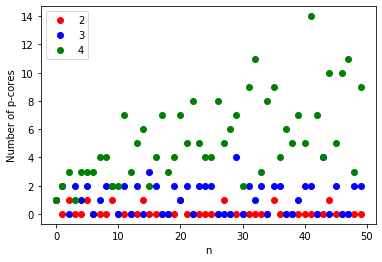

In [12]:
import matplotlib.pyplot as plt
#ith index corresponds to partitions of i+1 which have empty core (or full quotient)
full2quo = [0,2,0,5,0,10,0,20,0,36,0,65,0,110,0,185,0,300,0,481,0,752,0,1165,0,1770,0,2665,0,3956,0,5822,0,8470,0,12230,0,17490,0,24842,0,35002,0,49010,0,68160,0,94235,0,129512]
#ith index corresponds to partitions of i+1 which are p-cores (empty quotient)
full2core = [1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0]
full3core = [1,2,0,2,1,2,0,1,2,2,0,2,0,2,0,3,2,0,0,2,1,2,0,2,2,2,0,0,0,4,0,2,1,2,0,2,2,0,0,1,2,2,0,4,0,2,0,0,2,2]
full4core = [1,2,3,1,3,3,3,4,4,2,2,7,3,5,6,2,4,7,3,4,7,5,8,5,4,4,8,5,6,7,2,9,11,3,8,9,4,6,5,7,5,14,7,4,10,5,10,11,3,9]
full5core = [1,2,3,5,2,6,5,7,5,12,6,12,6,10,11,16,7,20,15,12,12,22,10,25,12,20,18,30,10,32,21,24,16,30,21,36,20,24,25,42,12,42,36,35,22,46,22,43,25,32]
full6core = [1, 2, 3, 5, 7, 5, 9, 10, 12, 12, 14, 20, 20, 21, 23, 24, 24, 32, 29, 35, 36, 44, 47, 38, 47, 49, 52, 55, 58, 59, 64, 66, 71, 70, 78, 79, 88, 87, 90, 85, 87, 111, 104, 102, 107, 112, 113, 121, 113]
full7core = [1, 2, 3, 5, 7, 11, 8, 15, 16, 21, 21, 28, 24, 44, 36, 49, 45, 63, 49, 74, 64, 85, 72, 105, 82, 133, 112, 120, 120, 165, 122, 180, 147, 186, 176, 225, 168, 255, 210, 245, 224, 324, 219, 338, 276, 341, 294, 385, 288]
full8core = [1, 2, 3, 5, 7, 11, 15, 14, 22, 26, 32, 37, 45, 47, 56, 75, 77, 89, 102, 111, 124, 142, 147, 167, 182, 196, 210, 242, 249, 288, 322, 299, 349, 382, 393, 423, 467, 453, 499, 570, 563, 602, 669, 649, 716, 772, 754, 843, 907]
full11core = [1, 2, 3, 5, 7, 11, 15, 22, 30, 42, 45, 66, 79, 102, 121, 154, 176, 220, 248, 297, 330, 430, 452, 552, 605, 720, 777, 935, 990, 1182, 1265, 1485, 1530, 1838, 1892, 2214, 2310, 2684, 2750, 3238, 3289, 3850, 3960, 4500, 4599, 5370, 5404, 6220, 6325]

#number of partitions of n
pn = [1,2,3,5,7,11,15,22,30,42,56,77,101,135,176,231,297,385,490,627,792,1002,1255,1575,1958,2436,3010,3718,4565,5604,6842,8349,10143,12310,14883,17977,21637,26015,31185,37338,44583,53174,63261,75175,89134,105558,124754,147273,173525,204226]

#partitions with at least one empty partition in the quotient
gequo2 = [1,2,3,4,6,7,10,12,16,19,24,30,36,44,53,64,76,92,108,128,151,178,208,244,284,330,384,443,512,592,680,780,896,1024,1170,1335,1520,1728,1964,2226,2520,2852,3220,3632,4095,4608,5180,5820,6528,7316]
gequo3 = [1,2,3,5,7,11,15,22,29,41,54,71,93,122,153,198,248,312,387,482,592,728,885,1082,1304,1577,1893,2271,2706,3232,3828,4541,5356,6320,7419,8714,10187,11913,13872,16159,18752,21758,25167,29107,33558,38690,44481,51126,58622,67196]

#partitions of n with p-core size (histogram)

plt.plot(full2core, 'ro', label="2")
plt.plot(full3core, 'bo', label="3")
plt.plot(full4core, 'go', label="4")
#following are commented out so axes aren't scaled too much
#plt.plot(full5core, 'co', label="5")
#plt.plot(full6core, 'mo', label="6")
#plt.plot(full7core, 'ko', label="7")
#plt.plot(full8core, 'yo', label="8")
#plt.plot(full11core, 'mo', label="11")
plt.xlabel("n")
plt.ylabel("Number of p-cores")
plt.legend(loc='upper left')
plt.show()

# Animation!
The following script creates all of the animated gifs!
More specifically for a given $p$, at time $n$, it displays the distribution of sizes of $p$-quotients of all partitions of $n$. The scale rapidly changes, and unexpectedly, for larger $p$, the distribution shifts left slightly and the number of partitions with full $p$-quotient isn't always the maximum.

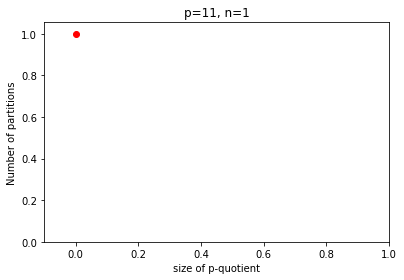

In [9]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter


p=11

fig, ax = plt.subplots()
fig.set_tight_layout(True)

writer = PillowWriter(fps=5)

distr2 = [[1],[0, 2],[1, 2],[0, 0, 5],[0, 2, 5],[1, 0, 0, 10],[0, 0, 5, 10],[0, 2, 0, 0, 20],[0, 0, 0, 10, 20],[1, 0, 5, 0, 0, 36],[0, 0, 0, 0, 20, 36],[0, 2, 0, 10, 0, 0, 65],[0, 0, 0, 0, 0, 36, 65],[0, 0, 5, 0, 20, 0, 0, 110],[1, 0, 0, 0, 0, 0, 65, 110],[0, 0, 0, 10, 0, 36, 0, 0, 185],[0, 2, 0, 0, 0, 0, 0, 110, 185],[0, 0, 0, 0, 20, 0, 65, 0, 0, 300],[0, 0, 5, 0, 0, 0, 0, 0, 185, 300],[0, 0, 0, 0, 0, 36, 0, 110, 0, 0, 481],[1, 0, 0, 10, 0, 0, 0, 0, 0, 300, 481],[0, 0, 0, 0, 0, 0, 65, 0, 185, 0, 0, 752],[0, 2, 0, 0, 20, 0, 0, 0, 0, 0, 481, 752],[0, 0, 0, 0, 0, 0, 0, 110, 0, 300, 0, 0, 1165],[0, 0, 5, 0, 0, 36, 0, 0, 0, 0, 0, 752, 1165],[0, 0, 0, 0, 0, 0, 0, 0, 185, 0, 481, 0, 0, 1770],[0, 0, 0, 10, 0, 0, 65, 0, 0, 0, 0, 0, 1165, 1770],[1, 0, 0, 0, 0, 0, 0, 0, 0, 300, 0, 752, 0, 0, 2665],[0, 0, 0, 0, 20, 0, 0, 110, 0, 0, 0, 0, 0, 1770, 2665],[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 481, 0, 1165, 0, 0, 3956],[0, 0, 0, 0, 0, 36, 0, 0, 185, 0, 0, 0, 0, 0, 2665, 3956],[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 752, 0, 1770, 0, 0, 5822],[0, 0, 0, 0, 0, 0, 65, 0, 0, 300, 0, 0, 0, 0, 0, 3956, 5822],[0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 1165, 0, 2665, 0, 0, 8470],[0, 0, 0, 0, 0, 0, 0, 110, 0, 0, 481, 0, 0, 0, 0, 0, 5822, 8470],[1, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 1770, 0, 3956, 0, 0, 12230],[0, 0, 0, 0, 0, 0, 0, 0, 185, 0, 0, 752, 0, 0, 0, 0, 0, 8470, 12230],[0, 2, 0, 0, 0, 36, 0, 0, 0, 0, 0, 0, 0, 0, 2665, 0, 5822, 0, 0, 17490],[0, 0, 0, 0, 0, 0, 0, 0, 0, 300, 0, 0, 1165, 0, 0, 0, 0, 0, 12230, 17490],[0, 0, 5, 0, 0, 0, 65, 0, 0, 0, 0, 0, 0, 0, 0, 3956, 0, 8470, 0, 0, 24842],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 481, 0, 0, 1770, 0, 0, 0, 0, 0, 17490, 24842],[0, 0, 0, 10, 0, 0, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 5822, 0, 12230, 0, 0, 35002],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 752, 0, 0, 2665, 0, 0, 0, 0, 0, 24842, 35002],[0, 0, 0, 0, 20, 0, 0, 0, 185, 0, 0, 0, 0, 0, 0, 0, 0, 8470, 0, 17490, 0, 0, 49010],[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1165, 0, 0, 3956, 0, 0, 0, 0, 0, 35002, 49010],[0, 0, 0, 0, 0, 36, 0, 0, 0, 300, 0, 0, 0, 0, 0, 0, 0, 0, 12230, 0, 24842, 0, 0, 68150],[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1770, 0, 0, 5822, 0, 0, 0, 0, 0, 49010, 68150],[0, 0, 0, 0, 0, 0, 65, 0, 0, 0, 481, 0, 0, 0, 0, 0, 0, 0, 0, 17490, 0, 35002, 0, 0, 94235],[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2665, 0, 0, 8470, 0, 0, 0, 0, 0, 68150, 94235]]
distr3 = [[1],[2],[0, 3],[2, 3],[1, 6],[2, 0, 9],[0, 6, 9],[1, 3, 18],[2, 6, 0, 22],[2, 0, 18, 22],[0, 3, 9, 44],[2, 6, 18, 0, 51],[0, 6, 0, 44, 51],[2, 0, 9, 22, 102],[0, 6, 18, 44, 0, 108],[3, 0, 18, 0, 102, 108],[2, 6, 0, 22, 51, 216],[0, 0, 18, 44, 102, 0, 221],[0, 9, 0, 44, 0, 216, 221],[2, 6, 18, 0, 51, 108, 442],[1, 0, 0, 44, 102, 216, 0, 429],[2, 0, 27, 0, 102, 0, 442, 429],[0, 6, 18, 44, 0, 108, 221, 858],[2, 3, 0, 0, 102, 216, 442, 0, 810],[2, 6, 0, 66, 0, 216, 0, 858, 810],[2, 0, 18, 44, 102, 0, 221, 429, 1620],[0, 6, 9, 0, 0, 216, 442, 858, 0, 1479],[0, 6, 18, 0, 153, 0, 442, 0, 1620, 1479],[0, 6, 0, 44, 102, 216, 0, 429, 810, 2958],[4, 0, 18, 22, 0, 0, 442, 858, 1620, 0, 2640],[0, 0, 18, 44, 0, 324, 0, 858, 0, 2958, 2640],[2, 0, 18, 0, 102, 216, 442, 0, 810, 1479, 5280],[1, 12, 0, 44, 51, 0, 0, 858, 1620, 2958, 0, 4599],[2, 0, 0, 44, 102, 0, 663, 0, 1620, 0, 5280, 4599],[0, 6, 0, 44, 0, 216, 442, 858, 0, 1479, 2640, 9198],[2, 3, 36, 0, 102, 108, 0, 0, 1620, 2958, 5280, 0, 7868],[2, 6, 0, 0, 102, 216, 0, 1287, 0, 2958, 0, 9198, 7868],[0, 0, 18, 0, 102, 0, 442, 858, 1620, 0, 2640, 4599, 15736],[0, 6, 9, 88, 0, 216, 221, 0, 0, 2958, 5280, 9198, 0, 13209],[1, 6, 18, 0, 0, 216, 442, 0, 2430, 0, 5280, 0, 15736, 13209],[2, 0, 0, 44, 0, 216, 0, 858, 1620, 2958, 0, 4599, 7868, 26418],[2, 0, 18, 22, 204, 0, 442, 429, 0, 0, 5280, 9198, 15736, 0, 21843],[0, 3, 18, 44, 0, 0, 442, 858, 0, 4437, 0, 9198, 0, 26418, 21843],[4, 6, 0, 0, 102, 0, 442, 0, 1620, 2958, 5280, 0, 7868, 13209, 43686],[0, 6, 0, 44, 51, 432, 0, 858, 810, 0, 0, 9198, 15736, 26418, 0, 35581],[2, 0, 9, 44, 102, 0, 0, 858, 1620, 0, 7920, 0, 15736, 0, 43686, 35581],[0, 12, 18, 0, 0, 216, 0, 858, 0, 2958, 5280, 9198, 0, 13209, 21843, 71162],[0, 0, 18, 0, 102, 108, 884, 0, 1620, 1479, 0, 0, 15736, 26418, 43686, 0, 57222],[2, 6, 0, 22, 102, 216, 0, 0, 1620, 2958, 0, 13797, 0, 26418, 0, 71162, 57222]]
distr4 =[[1],[2],[3],[1, 4],[3, 4],[3, 8],[3, 12],[4, 4, 14],[4, 12, 14],[2, 12, 28],[2, 12, 42],[7, 16, 14, 40],[3, 16, 42, 40],[5, 8, 42, 80],[6, 8, 42, 120],[2, 28, 56, 40, 105],[4, 12, 56, 120, 105],[7, 20, 28, 120, 210],[3, 24, 28, 120, 315],[4, 8, 98, 160, 105, 252],[7, 16, 42, 160, 315, 252],[5, 28, 70, 80, 315, 504],[8, 12, 84, 80, 315, 756],[5, 16, 28, 280, 420, 252, 574],[4, 28, 56, 120, 420, 756, 574],[4, 20, 98, 200, 210, 756, 1148],[8, 32, 42, 240, 210, 756, 1722],[5, 20, 56, 80, 735, 1008, 574, 1240],[6, 16, 98, 160, 315, 1008, 1722, 1240],[7, 16, 70, 280, 525, 504, 1722, 2480],[2, 32, 112, 120, 630, 504, 1722, 3720],[9, 20, 70, 160, 210, 1764, 2296, 1240, 2580],[11, 24, 56, 280, 420, 756, 2296, 3720, 2580],[3, 28, 56, 200, 735, 1260, 1148, 3720, 5160],[8, 8, 112, 320, 315, 1512, 1148, 3720, 7740],[9, 36, 70, 200, 420, 504, 4018, 4960, 2580, 5180],[4, 44, 84, 160, 735, 1008, 1722, 4960, 7740, 5180],[6, 12, 98, 160, 525, 1764, 2870, 2480, 7740, 10360],[5, 32, 28, 320, 840, 756, 3444, 2480, 7740, 15540],[7, 36, 126, 200, 525, 1008, 1148, 8680, 10320, 5180, 10108],[5, 16, 154, 240, 420, 1764, 2296, 3720, 10320, 15540, 10108],[14, 24, 42, 280, 420, 1260, 4018, 6200, 5160, 15540, 20216],[7, 20, 112, 80, 840, 2016, 1722, 7440, 5160, 15540, 30324],[4, 28, 126, 360, 525, 1260, 2296, 2480, 18060, 20720, 10108, 19208],[10, 20, 56, 440, 630, 1008, 4018, 4960, 7740, 20720, 30324, 19208],[5, 56, 84, 120, 735, 1008, 2870, 8680, 12900, 10360, 30324, 38416],[10, 28, 70, 320, 210, 2016, 4592, 3720, 15480, 10360, 30324, 57624],[11, 16, 98, 360, 945, 1260, 2870, 4960, 5160, 36260, 40432, 19208, 35693],[3, 40, 70, 160, 1155, 1512, 2296, 8680, 10320, 15540, 40432, 57624, 35693]]
distr5 = [[1],[2],[3],[5],[2, 5],[6, 5],[5, 10],[7, 15],[5, 25],[12, 10, 20],[6, 30, 20],[12, 25, 40],[6, 35, 60],[10, 25, 100],[11, 60, 40, 65],[16, 30, 120, 65],[7, 60, 100, 130],[20, 30, 140, 195],[15, 50, 100, 325],[12, 55, 240, 130, 190],[12, 80, 120, 390, 190],[22, 35, 240, 325, 380],[10, 100, 120, 455, 570],[25, 75, 200, 325, 950],[12, 60, 220, 780, 380, 506],[20, 60, 320, 390, 1140, 506],[18, 110, 140, 780, 950, 1012],[30, 50, 400, 390, 1330, 1518],[10, 125, 300, 650, 950, 2530],[32, 60, 240, 715, 2280, 1012, 1265],[21, 100, 240, 1040, 1140, 3036, 1265],[24, 90, 440, 455, 2280, 2530, 2530],[16, 150, 200, 1300, 1140, 3542, 3795],[30, 50, 500, 975, 1900, 2530, 6325],[21, 160, 240, 780, 2090, 6072, 2530, 2990],[36, 105, 400, 780, 3040, 3036, 7590, 2990],[20, 120, 360, 1430, 1330, 6072, 6325, 5980],[24, 80, 600, 650, 3800, 3036, 8855, 8970],[25, 150, 200, 1625, 2850, 5060, 6325, 14950],[42, 105, 640, 780, 2280, 5566, 15180, 5980, 6765],[12, 180, 420, 1300, 2280, 8096, 7590, 17940, 6765],[42, 100, 480, 1170, 4180, 3542, 15180, 14950, 13530],[36, 120, 320, 1950, 1900, 10120, 7590, 20930, 20295],[35, 125, 600, 650, 4750, 7590, 12650, 14950, 33825],[22, 210, 420, 2080, 2280, 6072, 13915, 35880, 13530, 14725],[46, 60, 720, 1365, 3800, 6072, 20240, 17940, 40590, 14725],[22, 210, 400, 1560, 3420, 11132, 8855, 35880, 33825, 29450],[43, 180, 480, 1040, 5700, 5060, 25300, 17940, 47355, 44175],[25, 175, 500, 1950, 1900, 12650, 18975, 29900, 33825, 73625]]
distr6 = [[1],[2],[3],[5],[7],[5, 6],[9, 6],[10, 12],[12, 18],[12, 30],[14, 42],[20, 30, 27],[20, 54, 27],[21, 60, 54],[23, 72, 81],[24, 72, 135],[24, 84, 189],[32, 120, 135, 98],[29, 120, 243, 98],[35, 126, 270, 196],[36, 138, 324, 294],[44, 144, 324, 490],[47, 144, 378, 686],[38, 192, 540, 490, 315],[47, 174, 540, 882, 315],[49, 210, 567, 980, 630],[52, 216, 621, 1176, 945],[55, 264, 648, 1176, 1575],[58, 282, 648, 1372, 2205],[59, 228, 864, 1960, 1575, 918],[64, 282, 783, 1960, 2835, 918],[66, 294, 945, 2058, 3150, 1836],[71, 312, 972, 2254, 3780, 2754],[70, 330, 1188, 2352, 3780, 4590],[78, 348, 1269, 2352, 4410, 6426],[79, 354, 1026, 3136, 6300, 4590, 2492],[88, 384, 1269, 2842, 6300, 8262, 2492],[87, 396, 1323, 3430, 6615, 9180, 4984],[90, 426, 1404, 3528, 7245, 11016, 7476],[85, 420, 1485, 4312, 7560, 11016, 12460],[87, 468, 1566, 4606, 7560, 12852, 17444],[111, 474, 1593, 3724, 10080, 18360, 12460, 6372],[104, 528, 1728, 4606, 9135, 18360, 22428, 6372],[102, 522, 1782, 4802, 11025, 19278, 24920, 12744],[107, 540, 1917, 5096, 11340, 21114, 29904, 19116],[112, 510, 1890, 5390, 13860, 22032, 29904, 31860],[113, 522, 2106, 5684, 14805, 22032, 34888, 44604],[121, 666, 2133, 5782, 11970, 29376, 49840, 31860, 15525],[113, 624, 2376, 6272, 14805, 26622, 49840, 57348, 15525]]
distr7 = [[1],[2],[3],[5],[7],[11],[8, 7],[15, 7],[16, 14],[21, 21],[21, 35],[28, 49],[24, 77],[44, 56, 35],[36, 105, 35],[49, 112, 70],[45, 147, 105],[63, 147, 175],[49, 196, 245],[74, 168, 385],[64, 308, 280, 140],[85, 252, 525, 140],[72, 343, 560, 280],[105, 315, 735, 420],[82, 441, 735, 700],[133, 343, 980, 980],[112, 518, 840, 1540],[120, 448, 1540, 1120, 490],[120, 595, 1260, 2100, 490],[165, 504, 1715, 2240, 980],[122, 735, 1575, 2940, 1470],[180, 574, 2205, 2940, 2450],[147, 931, 1715, 3920, 3430],[186, 784, 2590, 3360, 5390],[176, 840, 2240, 6160, 3920, 1547],[225, 840, 2975, 5040, 7350, 1547],[168, 1155, 2520, 6860, 7840, 3094],[255, 854, 3675, 6300, 10290, 4641],[210, 1260, 2870, 8820, 10290, 7735],[245, 1029, 4655, 6860, 13720, 10829],[224, 1302, 3920, 10360, 11760, 17017],[324, 1232, 4200, 8960, 21560, 12376, 4522],[219, 1575, 4200, 11900, 17640, 23205, 4522],[338, 1176, 5775, 10080, 24010, 24752, 9044],[276, 1785, 4270, 14700, 22050, 32487, 13566],[341, 1470, 6300, 11480, 30870, 32487, 22610],[294, 1715, 5145, 18620, 24010, 43316, 31654],[385, 1568, 6510, 15680, 36260, 37128, 49742],[288, 2268, 6160, 16800, 31360, 68068, 36176, 12405]]
distr8 = [[1],[2],[3],[5],[7],[11],[15],[14, 8],[22, 8],[26, 16],[32, 24],[37, 40],[45, 56],[47, 88],[56, 120],[75, 112, 44],[77, 176, 44],[89, 208, 88],[102, 256, 132],[111, 296, 220],[124, 360, 308],[142, 376, 484],[147, 448, 660],[167, 600, 616, 192],[182, 616, 968, 192],[196, 712, 1144, 384],[210, 816, 1408, 576],[242, 888, 1628, 960],[249, 992, 1980, 1344],[288, 1136, 2068, 2112],[322, 1176, 2464, 2880],[299, 1336, 3300, 2688, 726],[349, 1456, 3388, 4224, 726],[382, 1568, 3916, 4992, 1452],[393, 1680, 4488, 6144, 2178],[423, 1936, 4884, 7104, 3630],[467, 1992, 5456, 8640, 5082],[453, 2304, 6248, 9024, 7986],[499, 2576, 6468, 10752, 10890],[570, 2392, 7348, 14400, 10164, 2464],[563, 2792, 8008, 14784, 15972, 2464],[602, 3056, 8624, 17088, 18876, 4928],[669, 3144, 9240, 19584, 23232, 7392],[649, 3384, 10648, 21312, 26862, 12320],[716, 3736, 10956, 23808, 32670, 17248],[772, 3624, 12672, 27264, 34122, 27104],[754, 3992, 14168, 28224, 40656, 36960],[843, 4560, 13156, 32064, 54450, 34496, 7704],[907, 4504, 15356, 34944, 55902, 54208, 7704]]
distr11 = [[1],[2],[3],[5],[7],[11],[15],[22],[30],[42],[45, 11],[66, 11],[79, 22],[102, 33],[121, 55],[154, 77],[176, 121],[220, 165],[248, 242],[297, 330],[330, 462],[430, 495, 77],[452, 726, 77],[552, 869, 154],[605, 1122, 231],[720, 1331, 385],[777, 1694, 539],[935, 1936, 847],[990, 2420, 1155],[1182, 2728, 1694],[1265, 3267, 2310],[1485, 3630, 3234],[1530, 4730, 3465, 418],[1838, 4972, 5082, 418],[1892, 6072, 6083, 836],[2214, 6655, 7854, 1254],[2310, 7920, 9317, 2090],[2684, 8547, 11858, 2926],[2750, 10285, 13552, 4598],[3238, 10890, 16940, 6270],[3289, 13002, 19096, 9196],[3850, 13915, 22869, 12540],[3960, 16335, 25410, 17556],[4500, 16830, 33110, 18810, 1925],[4599, 20218, 34804, 27588, 1925],[5370, 20812, 42504, 33022, 3850],[5404, 24354, 46585, 42636, 5775],[6220, 25410, 55440, 50578, 9625],[6325, 29524, 59829, 64372, 13475]]
distr11ext = [[1],[2],[3],[5],[7],[11],[15],[22],[30],[42],[45, 11],[66, 11],[79, 22],[102, 33],[121, 55],[154, 77],[176, 121],[220, 165],[248, 242],[297, 330],[330, 462],[430, 495, 77],[452, 726, 77],[552, 869, 154],[605, 1122, 231],[720, 1331, 385],[777, 1694, 539],[935, 1936, 847],[990, 2420, 1155],[1182, 2728, 1694],[1265, 3267, 2310],[1485, 3630, 3234],[1530, 4730, 3465, 418],[1838, 4972, 5082, 418],[1892, 6072, 6083, 836],[2214, 6655, 7854, 1254],[2310, 7920, 9317, 2090],[2684, 8547, 11858, 2926],[2750, 10285, 13552, 4598],[3238, 10890, 16940, 6270],[3289, 13002, 19096, 9196],[3850, 13915, 22869, 12540],[3960, 16335, 25410, 17556],[4500, 16830, 33110, 18810, 1925],[4599, 20218, 34804, 27588, 1925],[5370, 20812, 42504, 33022, 3850],[5404, 24354, 46585, 42636, 5775],[6220, 25410, 55440, 50578, 9625],[6325, 29524, 59829, 64372, 13475],[7238, 30250, 71995, 73568, 21175],[7260, 35618, 76230, 91960, 28875],[8382, 36179, 91014, 103664, 42350],[8280, 42350, 97405, 124146, 57750],[9460, 43560, 114345, 137940, 80850],[9747, 49500, 117810, 179740, 86625, 7854],[10868, 50589, 141526, 188936, 127050, 7854],[10881, 59070, 145684, 230736, 152075, 15708],[12496, 59444, 170478, 252890, 196350, 23562],[12375, 68420, 177870, 300960, 232925, 39270],[14010, 69575, 206668, 324786, 296450, 54978],[14113, 79618, 211750, 390830, 338800, 86394],[15840, 79860, 249326, 413820, 423500, 117810],[15780, 92202, 253253, 494076, 477400, 172788],[17985, 91080, 296450, 528770, 571725, 235620],[17730, 104060, 304920, 620730, 635250, 329868],[19900, 107217, 346500, 639540, 827750, 353430, 29183],[20087, 119548, 354123, 768284, 870100, 518364, 29183],[22266, 119691, 413490, 790856, 1062600, 620466, 58366],[22047, 137456, 416108, 925452, 1164625, 801108, 87549],[25074, 136125, 478940, 965580, 1386000, 950334, 145915],[24636, 154110, 487025, 1121912, 1495725, 1209516, 204281],[27522, 155243, 557326, 1149500, 1799875, 1382304, 321013],[27570, 174240, 559020, 1353484, 1905750, 1727880, 437745],[30536, 173580, 645414, 1374802, 2275350, 1947792, 642026]]

biglist = distr11ext

def update(i):
    ax.clear()
    ax.set_xlabel('size of p-quotient')
    ax.plot(range(len(biglist[i])),biglist[i], 'ro')
    ax.set_ylabel("Number of partitions")
    ax.set_title('p=' + str(p) + ", n=" + str(i+1))
    ax.set_ylim(bottom=0)
    if len(biglist[i]) == 1:
        ax.set_xlim(-0.10,1.0)
    return ax
if __name__ == '__main__':
    anim = FuncAnimation(fig,update, 74, interval=500)
    if True: #len(sys.argv) > 1 and sys.argv[1] == 'save':
        #anim.save("p" + str(p) + "distr.gif", writer=writer)
        anim.save("demo.gif", writer=writer)

#### Additional Documentation (little use)
```hamming(n)``` gives the hamming weight, $\omega$ of $n$, for example $11=1011_2 \implies \omega(11) = 3$.

```v2(n)``` gives the 2-adic evaluation of $n$ (works for integers only).

```vadd(a,b)``` gives the vector sum $a+b$, and it will pad zeroes onto the end, so for example, $(2,3)+(3,4,5)=(5,7,5)$.

```tprint(a)``` gives a nice way of seeing the tableux represented by ```a```, which is stored as ```list[list[]]```


In [10]:
a = YT((7,5,5,3,1,1))
a.HL()
a.v2HL()
tprint(a.hlt)
print("Removing top right hook")
a = YT((4,4,4,3,1,1))
a.HL()
tprint(a.hlt)
print()
#print(a.v2list)
print("Removing bottom hook")
a = YT((4,4,4))
a.HL()
tprint(a.hlt)
print("Removing non-rim hook")
a = YT((4,3))
a.HL()
tprint(a.hlt)
print("Same")
a = YT((2,))
a.HL()
tprint(a.hlt)
#print()
#b = YT((5,3))
#b.HL()
#b.v2HL()
#tprint(b.hlt)
#print()
#tprint(b.v2t)

12  9  8  6  5  2  1 
 9  6  5  3  2 
 8  5  4  2  1 
 5  2  1 
 2 
 1 
Removing top right hook
 9  6  5  3 
 8  5  4  2 
 7  4  3  1 
 5  2  1 
 2 
 1 

Removing bottom hook
 6  5  4  3 
 5  4  3  2 
 4  3  2  1 
Removing non-rim hook
 5  4  3  1 
 3  2  1 
Same
 2  1 


In [11]:
a = YT((10,7,4,3,3,2,1,1,1,1))
a.HL()
a.v2HL()
tprint(a.hlt)
print("Removing top right hook")
a = YT((4,4,4,3,1,1))
a.HL()
tprint(a.hlt)
print()

19 14 12  9  7  6  5  3  2  1 
15 10  8  5  3  2  1 
11  6  4  1 
 9  4  2 
 8  3  1 
 6  1 
 4 
 3 
 2 
 1 
Removing top right hook
 9  6  5  3 
 8  5  4  2 
 7  4  3  1 
 5  2  1 
 2 
 1 

